In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dropout, Dense

In [2]:
df = pd.read_csv("data.csv")
x = df.copy()
x

,ball.x_coor,ball.y_coor,ball.x_vel,ball.y_vel,player_blue.rect.y,player_action
0,640.0,360.0,338.000000,-268.000000,300,0
1,645.0,356.0,338.357514,-268.899068,300,0
2,650.0,352.0,339.146370,-269.076101,300,0
3,655.0,348.0,339.193404,-269.444750,300,0
4,660.0,344.0,339.504486,-269.889200,300,0
...,...,...,...,...,...,...
5650,431.0,564.0,-274.841981,262.503476,400,0
5651,427.0,568.0,-275.164518,263.040189,400,0
5652,423.0,572.0,-275.219769,263.542067,400,0
5653,419.0,576.0,-275.390089,264.051264,400,0


total data: 5655


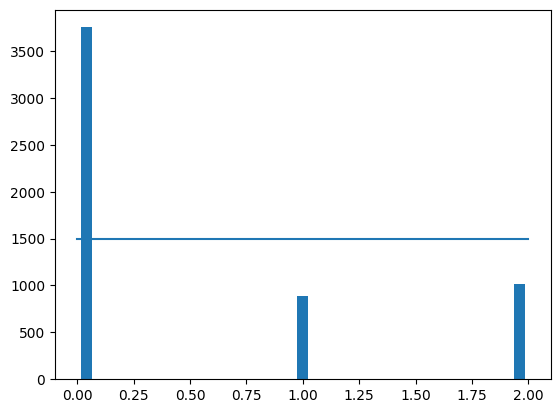

In [3]:
num_bins = 25
samples_per_bin = 1500
hist, bins = np.histogram(x['player_action'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(x['player_action']), np.max(x['player_action'])), (samples_per_bin, samples_per_bin))
print('total data:', len(x['player_action']))

In [4]:
remove_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(x['player_action'])):
        if x['player_action'][i] >= bins[j] and x['player_action'][i] <= bins[j+1]:
            list_.append(i)
    list_ = shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)

print('removed:', len(remove_list))
x.drop(x.index[remove_list], inplace=True)
print('remaining:', len(x['player_action']))
x

removed: 2253
remaining: 3402


,ball.x_coor,ball.y_coor,ball.x_vel,ball.y_vel,player_blue.rect.y,player_action
0,640.0,360.0,338.000000,-268.000000,300,0
1,645.0,356.0,338.357514,-268.899068,300,0
3,655.0,348.0,339.193404,-269.444750,300,0
4,660.0,344.0,339.504486,-269.889200,300,0
8,680.0,328.0,340.964860,-273.510722,300,0
...,...,...,...,...,...,...
5646,447.0,548.0,-271.852016,260.893257,400,0
5647,443.0,552.0,-272.358069,261.000847,400,0
5648,439.0,556.0,-273.286852,261.827781,400,0
5650,431.0,564.0,-274.841981,262.503476,400,0


In [5]:
y = x['player_action']
y

0       0
1       0
3       0
4       0
8       0
       ..
5646    0
5647    0
5648    0
5650    0
5651    0
Name: player_action, Length: 3402, dtype: int64

total data: 3402


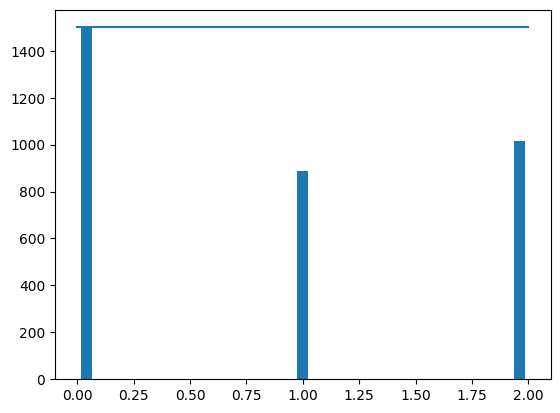

In [6]:
hist, bins = np.histogram(y, num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(y), np.max(y)), (samples_per_bin, samples_per_bin))
print('total data:', len(y))

Training Samples: 2721
Valid Samples: 681


Text(0.5, 1.0, 'Validation set')

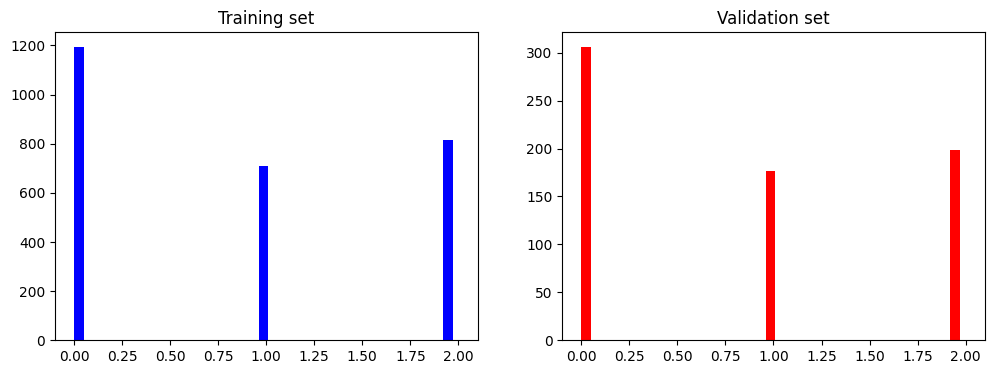

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=1)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [15]:
def game_model():
    model = Sequential()
    model.add(Dense(128, activation='selu', input_shape=(6,)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='selu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='selu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    optimizer = Adam(learning_rate=1e-3)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    return model

In [16]:
model = game_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               896       
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 3)                

In [19]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), steps_per_epoch=200, validation_steps=200, verbose=1, shuffle = 1)

Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 1.2254 - mae: 0.8232 - val_loss: 1.1953 - val_mae: 0.8076
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 1.2212 - mae: 0.8209
Epoch 3/10
200/200 [==============================] - 0s 1ms/step - loss: 1.2157 - mae: 0.8175
Epoch 4/10
200/200 [==============================] - 0s 1ms/step - loss: 1.2186 - mae: 0.8204
Epoch 5/10
200/200 [==============================] - 0s 1ms/step - loss: 1.2219 - mae: 0.8213
Epoch 6/10
200/200 [==============================] - 0s 1ms/step - loss: 1.2337 - mae: 0.8263
Epoch 7/10
200/200 [==============================] - 0s 1ms/step - loss: 1.2096 - mae: 0.8154
Epoch 8/10
200/200 [==============================] - 0s 1ms/step - loss: 1.2095 - mae: 0.8156
Epoch 9/10
200/200 [==============================] - 0s 2ms/step - loss: 1.2259 - mae: 0.8229
Epoch 10/10
200/200 [==============================] - 0s 1ms/step - loss: 1.2168 - mae: 0.8191
